# Evaluate how meaningful the latent space is (how separated is everything)

# ModelNet40

In [34]:
import numpy as np
import scipy as sp

from keras.models import Model
from keras.utils import to_categorical

from plots import plot_vox, plot_dots, plot_compare_recons, plot_recons
from data import load_data, load_custom_model

(x_train, y_train), (x_test, y_test), target_names = load_data('./ModelNet40/')
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

eval_model = load_custom_model('./models/eval_model_net40_acc_08047.hdf5')
manipulate_model = load_custom_model('./models/manipulate_model_net40_acc_08047.hdf5')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [36]:
latent_model = Model(eval_model.input, eval_model.layers[-3].output)
# latent_corpus = latent_model.predict(x_test)
# np.save('latent_space_corpora/mask_corpus_modelnet40.npy', latent_corpus)
latent_corpus = np.load('latent_space_corpora/mask_corpus_modelnet40.npy')

In [37]:
del x_train, y_train

In [63]:
import matplotlib.pyplot as plt
from matplotlib import cm
from MulticoreTSNE import MulticoreTSNE as TSNE
# %matplotlib notebook
%matplotlib inline

# del x_train, y_train

tsne = TSNE(2, n_jobs=4)

In [64]:
reduced = tsne.fit_transform(latent_corpus)

In [100]:
colors = cm.viridis(np.argmax(y_test, axis=1)/np.argmax(y_test, axis=1).max())
norm = plt.Normalize(1, 4)
cmap = cm.RdYlGn

In [108]:
names = np.array([target_names[i] for i in np.argmax(y_test, axis=1)])

<IPython.core.display.Javascript object>


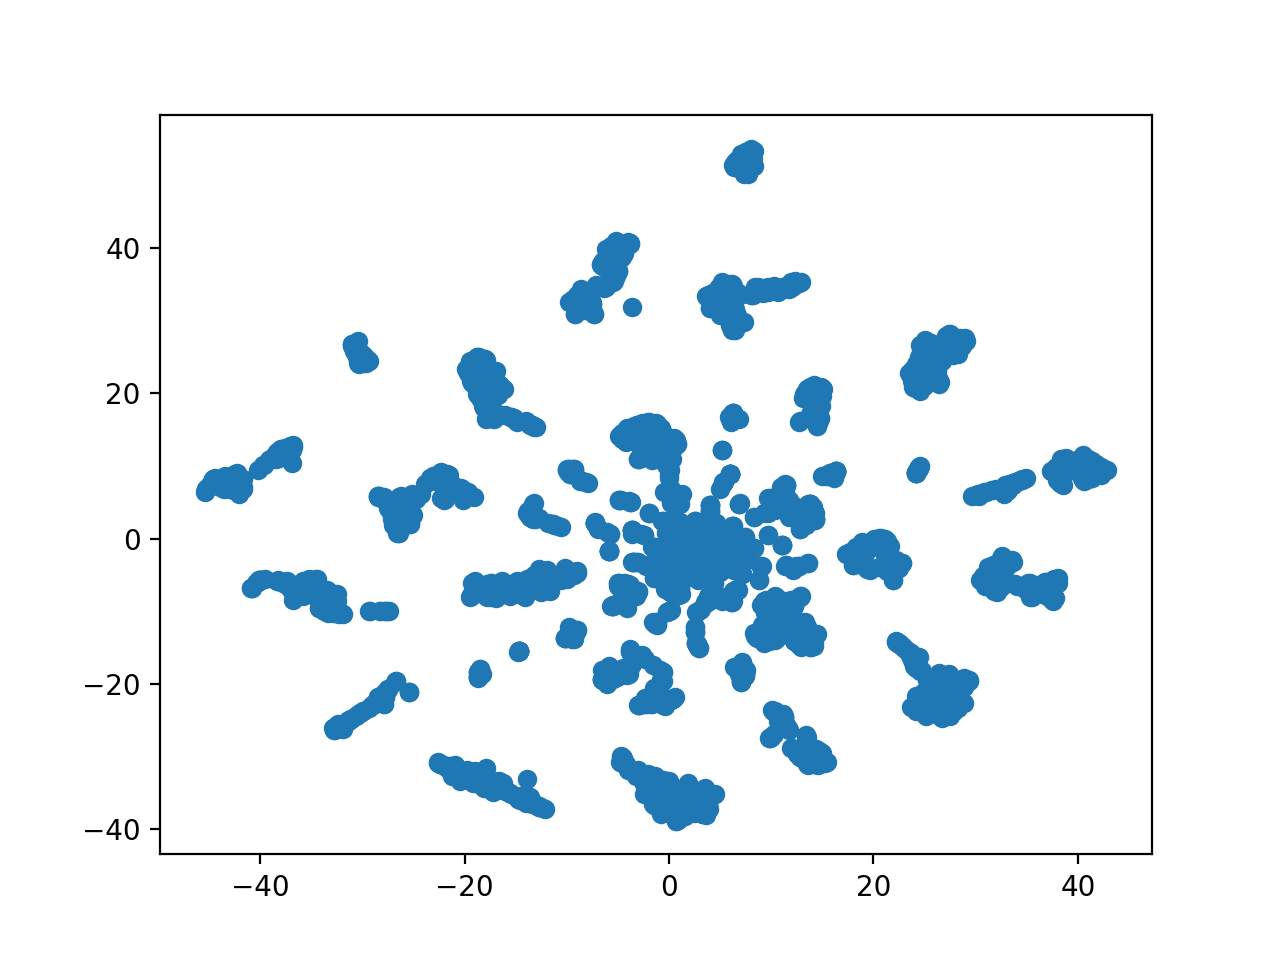

In [128]:
x = reduced[:, 0]
y = reduced[:, 1]
# names = np.array(list("ABCDEFGHIJKLMNO"))
names = np.array([target_names[i] for i in np.argmax(y_test, axis=1)])[:10]

# norm = plt.Normalize(1,4)

fig,ax = plt.subplots()
# sc = plt.scatter(x,y,c=colors, s=100, cmap=cmap, norm=norm)
sc = plt.scatter(x,y)

annot = ax.annotate("", xy=(0,0), xytext=(2,2),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
#     annot.get_bbox_patch().set_facecolor(cmap=cmap)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

tutorial

<IPython.core.display.Javascript object>


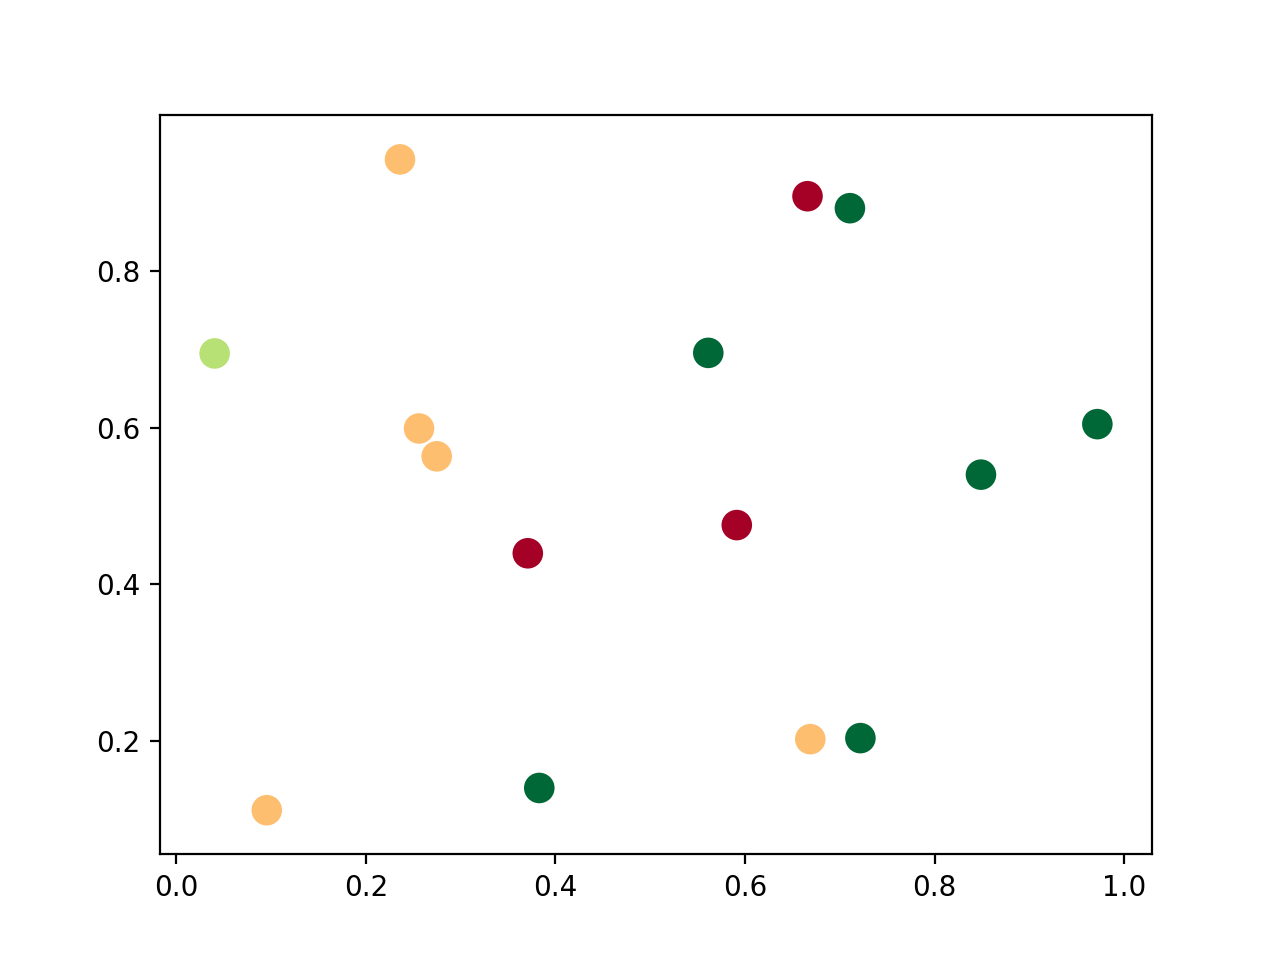

In [115]:
x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [ ]:
sc.contains()

# ModelNet10

In [1]:
import numpy as np
import scipy as sp

from keras.models import Model
from keras.utils import to_categorical

from plots import plot_vox, plot_dots, plot_compare_recons, plot_recons
from data import load_data, load_custom_model

(x_train, y_train), (x_test, y_test), target_names = load_data('./ModelNet10/')
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

eval_model = load_custom_model('./models/eval_model_net10_acc_089868.hdf5')
manipulate_model = load_custom_model('./models/manipulate_model_net10_acc_089868.hdf5')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


Instructions for updating:
dim is deprecated, use axis instead


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
latent_model = Model(eval_model.input,
                     eval_model.layers[-3].output)
# latent_corpus = latent_modelnet10.predict(x_test)
# np.save('latent_space_corpora/mask_corpus_modelnet10.npy',
#         latent_corpus)
latent_corpus = \
    np.load('latent_space_corpora/mask_corpus_modelnet10.npy')

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cm
from MulticoreTSNE import MulticoreTSNE as TSNE
%matplotlib notebook

# del x_train, y_train

tsne = TSNE(3, n_jobs=4)

In [31]:
reduced = tsne.fit_transform(latent_corpus)

<IPython.core.display.Javascript object>


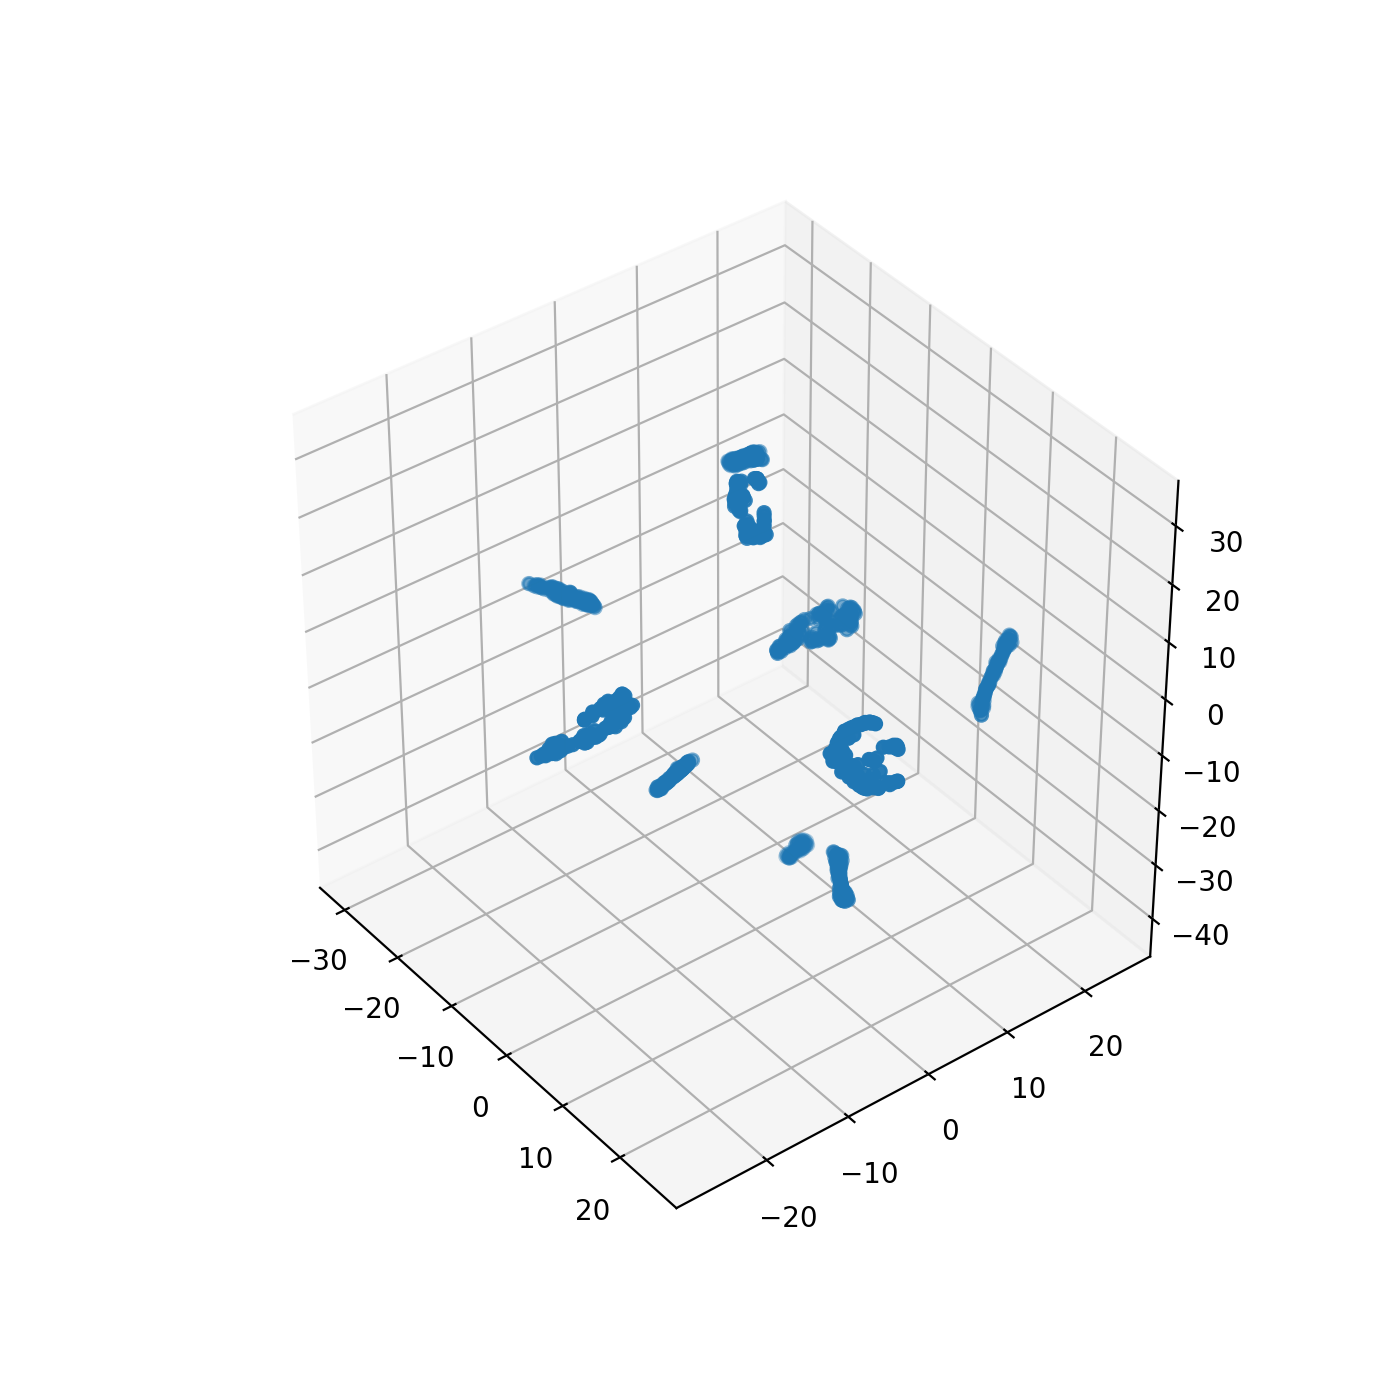

In [33]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2])